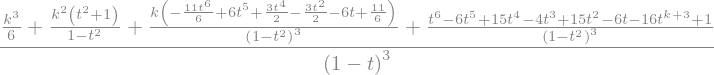

In [7]:
from sympy import *
from sympy.vector import Vector
from sympy.vector import CoordSys3D
N = CoordSys3D('N')

t, k, a = symbols( 't k a' )
init_printing(use_unicode=True)

# Define the terms in the equivariant Verlinde formula:

def c0(t,k):
    return ( 1 - 6*t + 15*t**2 - 4*t**3 + 15*t**4 - 6*t**5 + t**6 - 16*t**(k+3) ) / ( 1 - t**2 )**3

def c1(t,k):
    return Rational(1,6) * ( 11 - 36*t - 9*t**2 + 9*t**4 + 36*t**5 - 11*t**6 ) / ( 1 - t**2 )**3

def c2(t,k):
    return ( 1 + t**2 ) / ( 1 - t**2 )

def c3(t,k):
    return Rational(1,6)

# Define the function for the equivariant Verlinde formula as given in the paper, and print it for completeness:

def d2(k,t):
    return ( c3(t,k)*k**3 + c2(t,k)*k**2 + c1(t,k)*k + c0(t,k) ) / ( 1 - t )**3

d2(k,t)

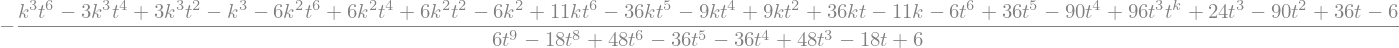

In [17]:
cancel(d2(k,t))

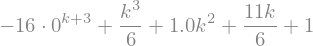

In [69]:
# The degree-0 term agrees with the usual Verlinde formula:

d2(0,k)

In [70]:
# Equivariant Verlinde formula for k = 1, up to t-degree 20

series(d2(t,1), t, n=8)

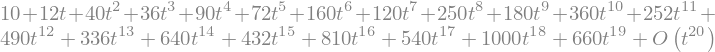

In [59]:
# Equivariant Verlinde formula for k = 2, up to t-degree 20

series(d2(t,2), t, n=20)

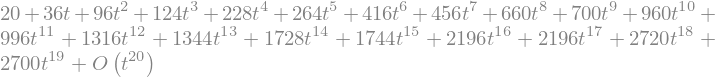

In [60]:
# Equivariant Verlinde formula for k = 3, up to t-degree 20

series(d2(t,3), t, n=20)

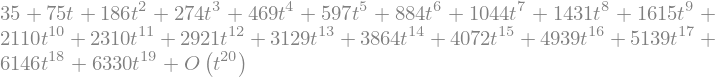

In [56]:
# Equivariant Verlinde formula for k = 4, up to t-degree 20

series(d2(t,4), t, n=20)

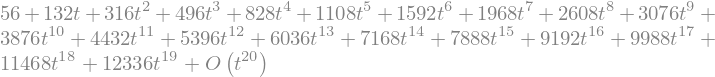

In [55]:
# Equivariant Verlinde formula for k = 5, up to t-degree 20

series(d2(t,5), t, n=20)

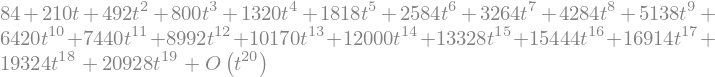

In [54]:
# Equivariant Verlinde formula for k = 6, up to t-degree 20

series(d2(t,6), t, n=20)

In [14]:
# We now set-up the calculation for the localisation formula, similar to the previous calculations:

# Define the vector which is not parallel to any edge vector, which will tend to zero:

Phi = t*(N.i + 2*N.j + 3*N.k)

# Basis for the edge/weight vectors for the points 

x = N.i

y = N.j

z = N.k

# Set the fixed points of the action; P denotes those that belong
# to the core, and Q those that come from the cut extended core:

# Vertices for Delta4:

def P123(k,a):
    return Vector.zero

def Q123_12(k,a):
    return -a*z

def Q123_13(k,a):
    return -a*y

def Q123_23(k,a):
    return -a*z

# Vertices for Delta3:

def P124(k,a):
    return k*z

def Q124_12(k,a):
    return (k+a)*z

def Q124_14(k,a):
    return -a*y + (k+a)*z

def Q124_24(k,a):
    return -a*x + (k+a)*z

# Vertices for Delta2:

def P134(k,a):
    return k*y

def Q134_13(k,a):
    return (k+a)*y

def Q134_14(k,a):
    return (k+a)*y - a*z

def Q134_34(k,a):
    return -a*z + (k+a)*y

# Vertices for Delta1:

def P234(k,a):
    return k*x

def Q234_23(k,a):
    return (k+a)*x

def Q234_24(k,a):
    return (k+a)*x - a*z

def Q234_34(k,a):
    return (k+a)*x - a*y

# Define the term which is summed over each fixed point,
# representing the character for the representation

def f(P, edge1, edge2, edge3):
    return exp( Phi.dot(P) ) / ( (1 - exp( Phi.dot(edge1) ) ) * ( 1 - exp( Phi.dot(edge2) ) ) * ( 1 - exp( Phi.dot(edge3) ) ) )

# For each of the right-angled triangles:

# For Delta1:

def Weight1(k,a):
    return f(P234(k,a), -x, -x + y, -x + z)

def Denominator1(k,a):
    return f(Vector.zero, x, x - y, x - z) + f(a*x, -x, -y, -z) + f(a*x - a*z, z, -x + z, -y + z) + f(a*x - a*y, y, -x + y, y - z)

def Delta1(k,a):
    return Weight1(k,a) * Denominator1(k,a)

# For Delta2:

def Weight2(k,a):
    return f(P134(k,a), -y, x - y, -y + z)

def Denominator2(k,a):
    return f(Vector.zero, y, -x + y, y - z) + f(a * y, -y, -x, -z) + f(-a*x + a*y, x - y, x, x - z) + f(a*y - a*z, -y + z, z, -x + z)

def Delta2(k,a):
    return Weight2(k,a) * Denominator2(k,a)

# For Delta3:

def Weight3(k,a):
    return f(P124(k,a), -z, x - z, y - z)

def Denominator3(k,a):
    return f(Vector.zero, z, -x + z, -y + z) + f(a*z, -z, -x, -y) + f(-a*y + a*z, y, -x + y, y - z) + f(-a*x + a*z, x, x - y, x - z)

def Delta3(k,a):
    return Weight3(k,a) * Denominator3(k,a)

# For Delta4:

def Weight4(k,a):
    return f(P123(k,a), x, y, z)

def Denominator4(k,a):
    return f(Vector.zero, -x, -y, -z) + f(-a*x, x, x - y, x - z) + f(-a*y, y, -x + y, y - z) + f(-a*z, z, -x + z, -y + z)

def Delta4(k,a):
    return Weight4(k,a) * Denominator4(k,a)

# Add up each Delta function to obtain the sum for all the vertices:

def Sum(k,a):
    return Delta1(k,a) + Delta2(k,a) + Delta3(k,a) + Delta4(k,a)

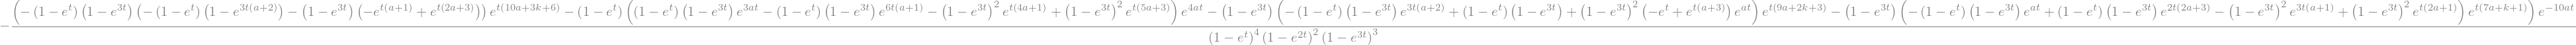

In [5]:
simplify(Sum(k,a))

In [15]:
# Take the limit for Phi -> 0 to get the Euler characteristic:

def EulerCalculation(k,a):
    return limit(Sum(k,a), t, 0)

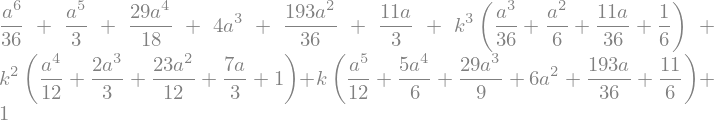

In [16]:
collect(EulerCalculation(k,a), k)

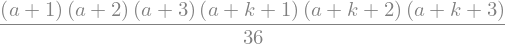

In [34]:
factor(EulerCalculation(k,a))

In [6]:
def Euler(k,a):
    return simplify( Rational(1,36) * ( (a+1)*(a+2)*(a+3)*(a+k+1)*(a+k+2)*(a+k+3) ) )

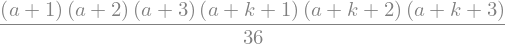

In [43]:
Euler(k,a)

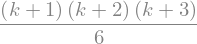

In [18]:
Euler(k,0)

In [23]:
def Diff(k,a):
    return factor(Euler(k,a) - Euler(k,a-1))

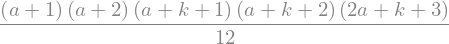

In [24]:
Diff(k,a)

In [29]:
Diff(1,1)

In [31]:
Diff(1,2)

In [32]:
Diff(1,3)

In [33]:
series(d2(t,1), t, n=8)

ZeroDivisionError: division by zero